 ## import the necessary libraries

In [3]:
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt 
from dataprep.clean.clean_country import validate_country

## Quick overview of the data

In [4]:
ships = pd.read_csv("/home/user/Downloads/ships/US_MerchantFleet_ST202010011334_v4.csv")
print(ships.info())
print(ships["Economy Label"].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79873 entries, 0 to 79872
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year                                    79873 non-null  int64  
 1   Economy                                 79873 non-null  object 
 2   Economy Label                           79873 non-null  object 
 3   ShipType                                79873 non-null  int64  
 4   ShipType Label                          79873 non-null  object 
 5   Dead weight tons in thousands           79873 non-null  float64
 6   Dead weight tons in thousands Footnote  0 non-null      float64
 7   Percentage of total world               79873 non-null  float64
 8   Percentage of total world Footnote      0 non-null      float64
 9   Percentage of total fleet               79873 non-null  float64
 10  Percentage of total fleet Footnote      0 non-null      fl

## Drop empty columns

In [5]:
ships = ships.dropna(axis="columns")
print(ships.info())
print(ships.head(10))                
ships = ships.replace("Korea, Republic of", "South Korea")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79873 entries, 0 to 79872
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           79873 non-null  int64  
 1   Economy                        79873 non-null  object 
 2   Economy Label                  79873 non-null  object 
 3   ShipType                       79873 non-null  int64  
 4   ShipType Label                 79873 non-null  object 
 5   Dead weight tons in thousands  79873 non-null  float64
 6   Percentage of total world      79873 non-null  float64
 7   Percentage of total fleet      79873 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 4.9+ MB
None
   Year Economy Economy Label  ShipType        ShipType Label  \
0  1980    0000         World         0           Total fleet   
1  1980    0000         World         1           Oil tankers   
2  1980    0000         World 

## Q1) show world shipping growth over the years

In [6]:
world_ships = ships[ships["Percentage of total world"] == 100]
print(world_ships.to_string())
x= world_ships[world_ships["ShipType Label"] == "Total fleet"]
print(x)

       Year Economy Economy Label  ShipType        ShipType Label  Dead weight tons in thousands  Percentage of total world  Percentage of total fleet
0      1980    0000         World         0           Total fleet                     672142.488                      100.0                  100.00000
1      1980    0000         World         1           Oil tankers                     337895.557                      100.0                   50.27142
2      1980    0000         World         2         Bulk carriers                     181880.282                      100.0                   27.05978
3      1980    0000         World         3         General cargo                     112840.897                      100.0                   16.78824
4      1980    0000         World         4       Container ships                      10290.114                      100.0                    1.53094
5      1980    0000         World         5  Other types of ships                      29235.6

Text(0.5, 1.0, 'Total Global Ship Fleet 1980-2020')

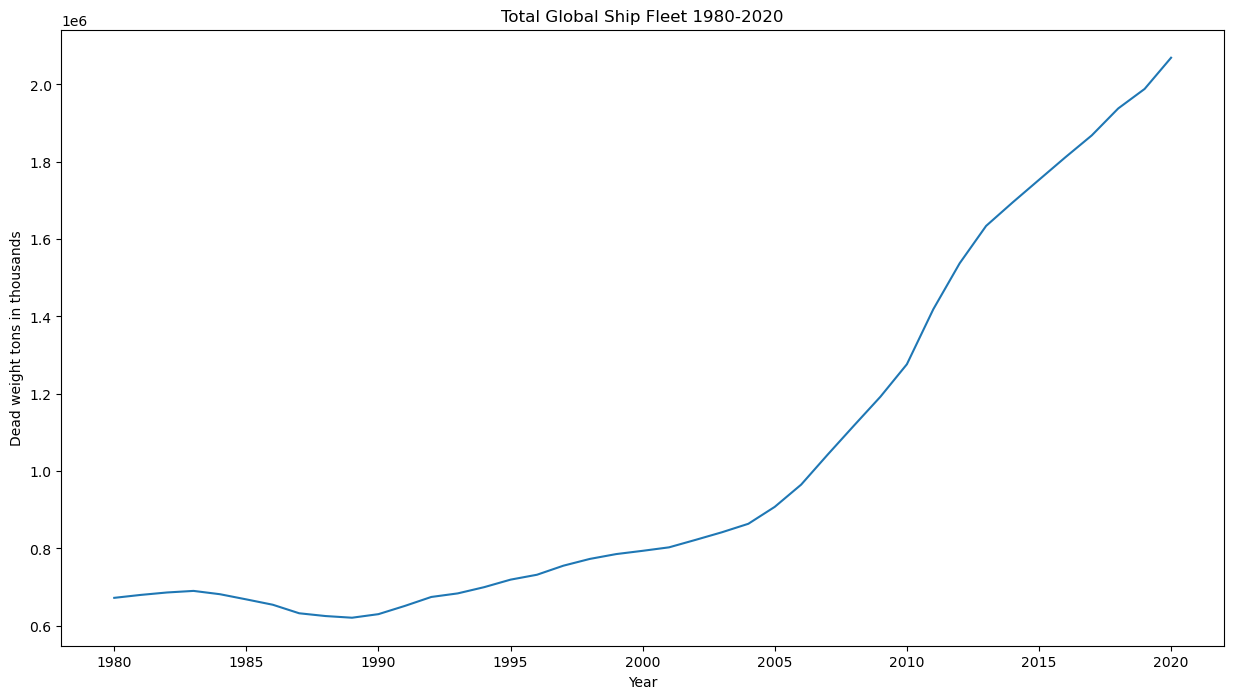

In [7]:
# plot the world's ships 1980-2020
plt.figure(figsize=(15,8))
sns.lineplot(x="Year", y="Dead weight tons in thousands", data=x)
plt.title("Total Global Ship Fleet 1980-2020")

From the above curve, we can see that from around 1983 to 1990 there had been a slight decline in ship building. As
from 1990 we see a very strong growth curve in shipping activities with the main growth taking place from the year 
2005.

## q2)what countries own the biggest fleets ?

In [31]:
# Drop regional Economies
def drop_regionals(df):
    df["remove_region"] = validate_country(df["Economy Label"])
    df = df[df["remove_region"] == True]
    print(df)
    
ships = drop_regionals(ships)

       Year Economy   Economy Label  ShipType        ShipType Label  \
6      1980     008         Albania         0           Total fleet   
7      1980     008         Albania         3         General cargo   
8      1980     012         Algeria         0           Total fleet   
9      1980     012         Algeria         1           Oil tankers   
10     1980     012         Algeria         2         Bulk carriers   
...     ...     ...             ...       ...                   ...   
79868  2020     926  United Kingdom         1           Oil tankers   
79869  2020     926  United Kingdom         2         Bulk carriers   
79870  2020     926  United Kingdom         3         General cargo   
79871  2020     926  United Kingdom         4       Container ships   
79872  2020     926  United Kingdom         5  Other types of ships   

       Dead weight tons in thousands  Percentage of total world  \
6                             78.949                   0.011746   
7            

In [10]:
# sum the total cargo tonnes per country across all the years and get the top 10
flag = ships[ships["ShipType Label"].str.contains("Total fleet")]
print(flag)
country_tonnage = flag.groupby("Economy Label")["Dead weight tons in thousands"].sum().sort_values(ascending=False).reset_index()
world_ships_ten = country_tonnage.head(10)
print(world_ships_ten)

       Year Economy                 Economy Label  ShipType ShipType Label  \
6      1980     008                       Albania         0    Total fleet   
8      1980     012                       Algeria         0    Total fleet   
13     1980     024                        Angola         0    Total fleet   
17     1980     028           Antigua and Barbuda         0    Total fleet   
19     1980     032                     Argentina         0    Total fleet   
...     ...     ...                           ...       ...            ...   
79837  2020     850  United States Virgin Islands         0    Total fleet   
79843  2020     858                       Uruguay         0    Total fleet   
79855  2020     882                         Samoa         0    Total fleet   
79861  2020     887                         Yemen         0    Total fleet   
79867  2020     926                United Kingdom         0    Total fleet   

       Dead weight tons in thousands  Percentage of total world

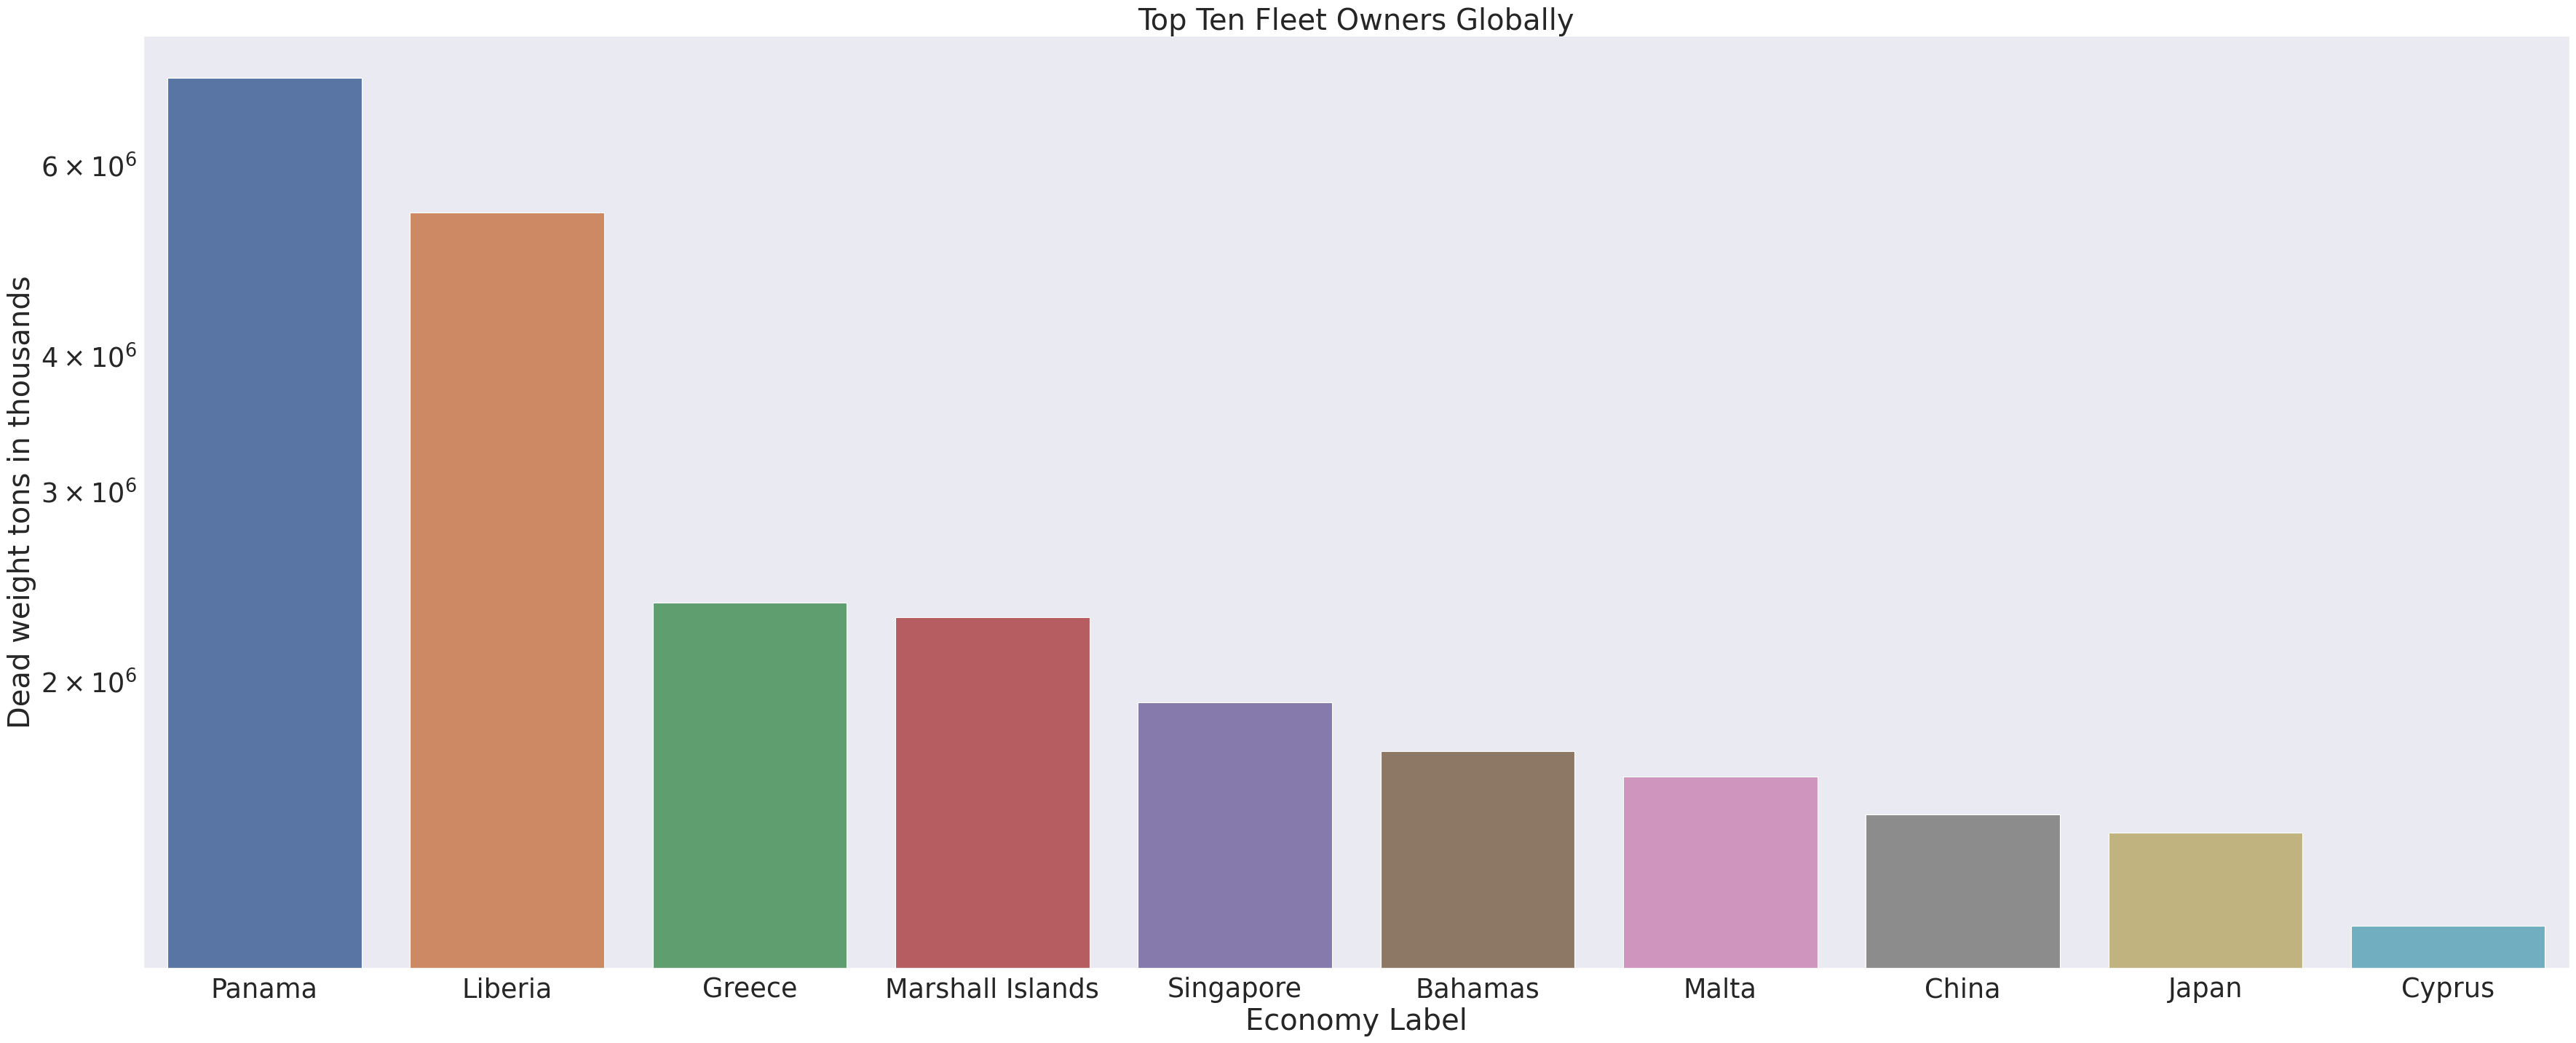

In [30]:
# a bar plot of the top ten world ships 
sns.set(font_scale=3, context="paper", color_codes=False)

fig, axes = plt.subplots(1, 1, figsize=(35, 15))
sns.barplot(data=world_ships_ten, x="Economy Label", y="Dead weight tons in thousands").set(title="Top Ten Fleet Owners Globally")
plt.tight_layout()
plt.yscale('log')
plt.show()

## A GeoDataframe

In [12]:
df_geo = gpd.GeoDataFrame(country_tonnage)
print(df_geo.head(3))
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world_ships = country_tonnage.rename(columns = {'Economy Label':'name'})
merge = pd.merge(world, world_ships, on="name")
print(merge.head())

  Economy Label  Dead weight tons in thousands
0        Panama                    7230693.777
1       Liberia                    5424935.142
2        Greece                    2367592.918
       pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   37589262.0  North America                    Canada    CAN     1736425   
2  328239523.0  North America  United States of America    USA    21433226   
3   18513930.0           Asia                Kazakhstan    KAZ      181665   
4    8776109.0        Oceania          Papua New Guinea    PNG       24829   

                                            geometry  \
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...   
1  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...   
2  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...   
3  POLYGON ((87.35997 49.21498, 86.59878 48.54918...   
4  MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...   

   Dea

Text(0.5, 1.0, 'World map 10 largest fleet owners')

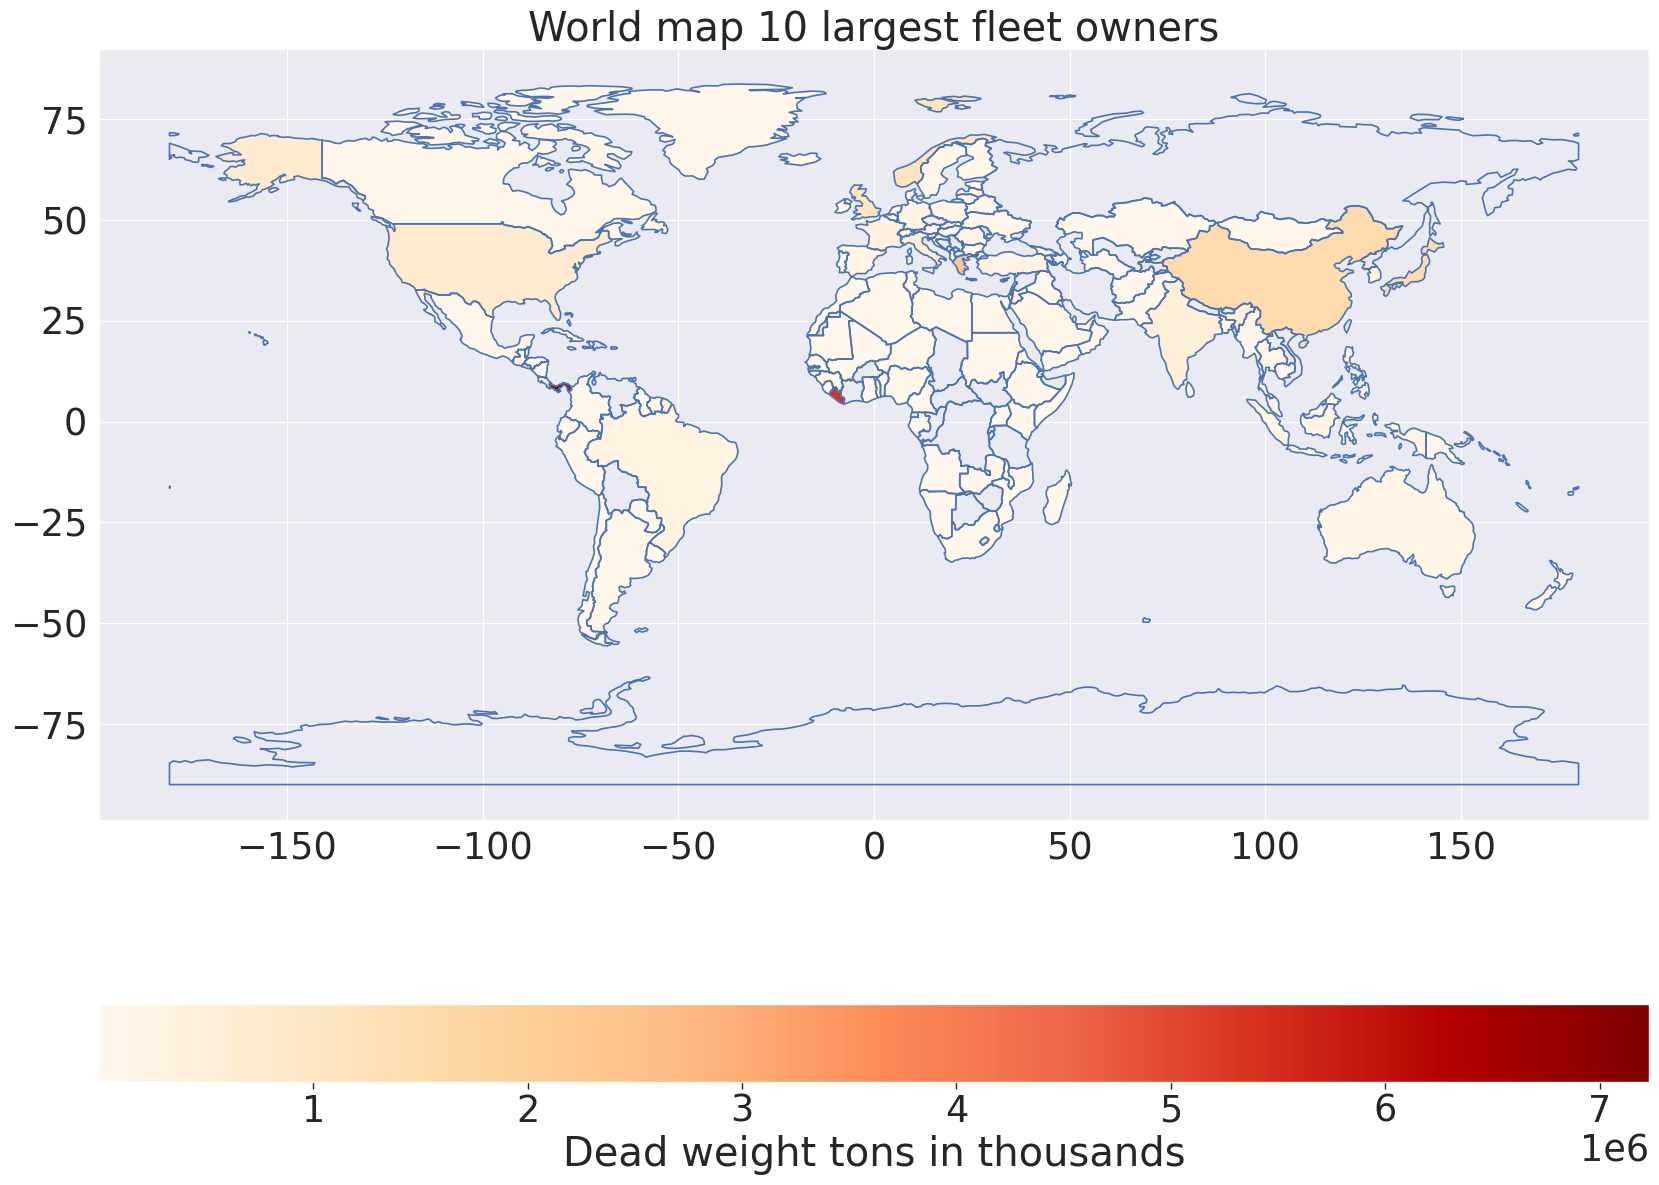

In [28]:
# world map ships distribution
ax = world["geometry"].boundary.plot(figsize=(20,16))
merge.plot( column="Dead weight tons in thousands", ax=ax, cmap='OrRd', 
                     legend=True, legend_kwds={"label": "Dead weight tons in thousands", "orientation":"horizontal"})
plt.title("World map 10 largest fleet owners")

## q3) under what flag are most ships registered?

In [14]:
oil_tankers = ships[ships["ShipType Label"].isin(["Oil tankers"])]["Dead weight tons in thousands"].sum()
print("Tonnes in Thousands for oil tankers:", oil_tankers)
Bulk_carriers = ships[ships["ShipType Label"].isin(["Bulk carriers"])]["Dead weight tons in thousands"].sum()
print("Tonnes in Thousands for bulk carriers:", Bulk_carriers)
General_cargo = ships[ships["ShipType Label"].isin(["General cargo"])]["Dead weight tons in thousands"].sum()
print("Tonnes in Thousands for general cargo ships:", General_cargo)
Container_ships = ships[ships["ShipType Label"].isin(["Container ships"])]["Dead weight tons in thousands"].sum()
print("Tonnes in Thousands for container ships:", Container_ships)
Other_types_of_ships = ships[ships["ShipType Label"].isin(["Other types of ships"])]["Dead weight tons in thousands"].sum()
print("Tonnes in Thousands for other types of ships:", Other_types_of_ships)

Tonnes in Thousands for oil tankers: 13769436.252999999
Tonnes in Thousands for bulk carriers: 14308544.809
Tonnes in Thousands for general cargo ships: 3527164.45
Tonnes in Thousands for container ships: 3666671.6939999997
Tonnes in Thousands for other types of ships: 3528156.771


Text(0.5, 1.0, 'Types Of Ships Ferrying Worldwide')

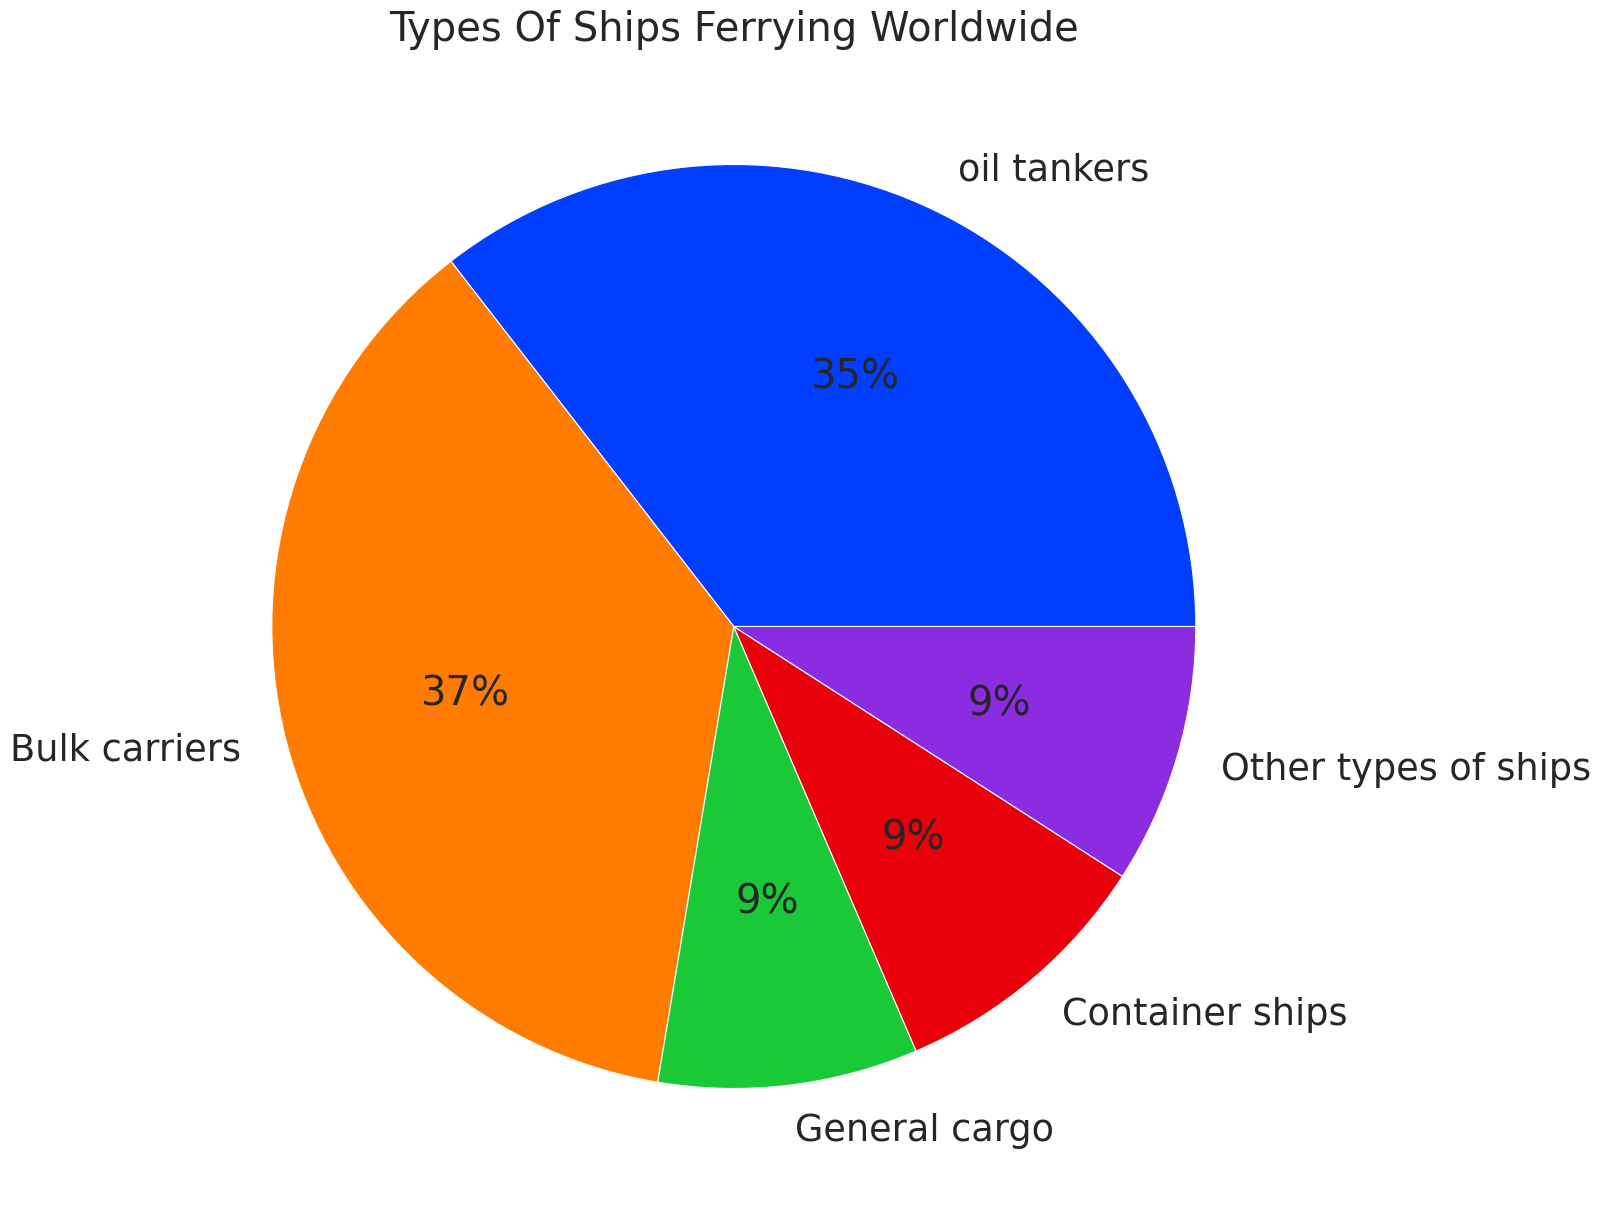

In [15]:
# plot out the types of ships
data = [oil_tankers, Bulk_carriers, General_cargo, Container_ships, Other_types_of_ships]
keys = ["oil tankers", "Bulk carriers", "General cargo", "Container ships", "Other types of ships"]
fig, axes = plt.subplots(1, 1, figsize=(35, 15))
palette_color = sns.color_palette('bright')
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title("Types Of Ships Ferrying Worldwide")

From the pie chart we can see that most ships are registered as bulk carriers at 37%, followed by oil tankers at 35%.

## q4) Where are most ships built ?

### read in the ship building csv data 

In [16]:
ship_building = pd.read_csv("/home/user/Downloads/ships/US_ShipBuilding_ST202010131356_v1.csv")
ship_building = ship_building.replace("Korea, Republic of", "South Korea")
print(ship_building.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Year                                        1314 non-null   int64  
 1   Series                                      1314 non-null   int64  
 2   Series Label                                1314 non-null   object 
 3   Country                                     1314 non-null   object 
 4   Country Label                               1314 non-null   object 
 5   ShipType                                    1314 non-null   int64  
 6   ShipType Label                              1314 non-null   object 
 7   Percentage of total all economies           1314 non-null   float64
 8   Percentage of total all economies Footnote  1 non-null      object 
 9   Gross Tonnage                               1314 non-null   int64  
 10  Gross Tonnag

In [41]:
# Drop regional Economies
ship_building["remove_region"] = validate_country(ship_building["Country Label"])
ship_building = ship_building[ship_building["remove_region"] == True]
print(ship_building)

      Year  Series                       Series Label Country  \
2     2014    2306  Ship building by country of built      31   
3     2014    2306  Ship building by country of built      32   
4     2014    2306  Ship building by country of built      36   
5     2014    2306  Ship building by country of built      40   
6     2014    2306  Ship building by country of built      48   
...    ...     ...                                ...     ...   
1309  2019    2306  Ship building by country of built     792   
1310  2019    2306  Ship building by country of built     804   
1311  2019    2306  Ship building by country of built     818   
1312  2019    2306  Ship building by country of built     842   
1313  2019    2306  Ship building by country of built     926   

                 Country Label  ShipType ShipType Label  \
2                   Azerbaijan         0    Total fleet   
3                    Argentina         0    Total fleet   
4                    Australia         0  

In [19]:
# Total Sum Of Ships Built Over the Entire Duration 
total_build = ship_building.groupby("Country Label")["Gross Tonnage"].sum().sort_values(ascending=False).reset_index()
print(total_build)

               Country Label  Gross Tonnage
0                      China      140508333
1                South Korea      130005061
2                      Japan       83450672
3                Philippines        9611381
4                    Germany        2748839
5                      Italy        2417805
6                    Romania        2305445
7                     Brazil        1558371
8   United States of America        1476958
9                     France        1117974
10                   Finland         970889
11                    Norway         901579
12                    Turkey         719142
13               Netherlands         645658
14                 Indonesia         599648
15                     Spain         546136
16        Russian Federation         383262
17                 Singapore         371820
18                   Croatia         360510
19                     India         305182
20                  Malaysia         231006
21                    Poland    

              Country Label  Gross Tonnage
0                     China      140508333
1               South Korea      130005061
2                     Japan       83450672
3               Philippines        9611381
4                   Germany        2748839
5                     Italy        2417805
6                   Romania        2305445
7                    Brazil        1558371
8  United States of America        1476958
9                    France        1117974


Text(0.5, 1.0, 'Top 10 Ship Builders Worldwide')

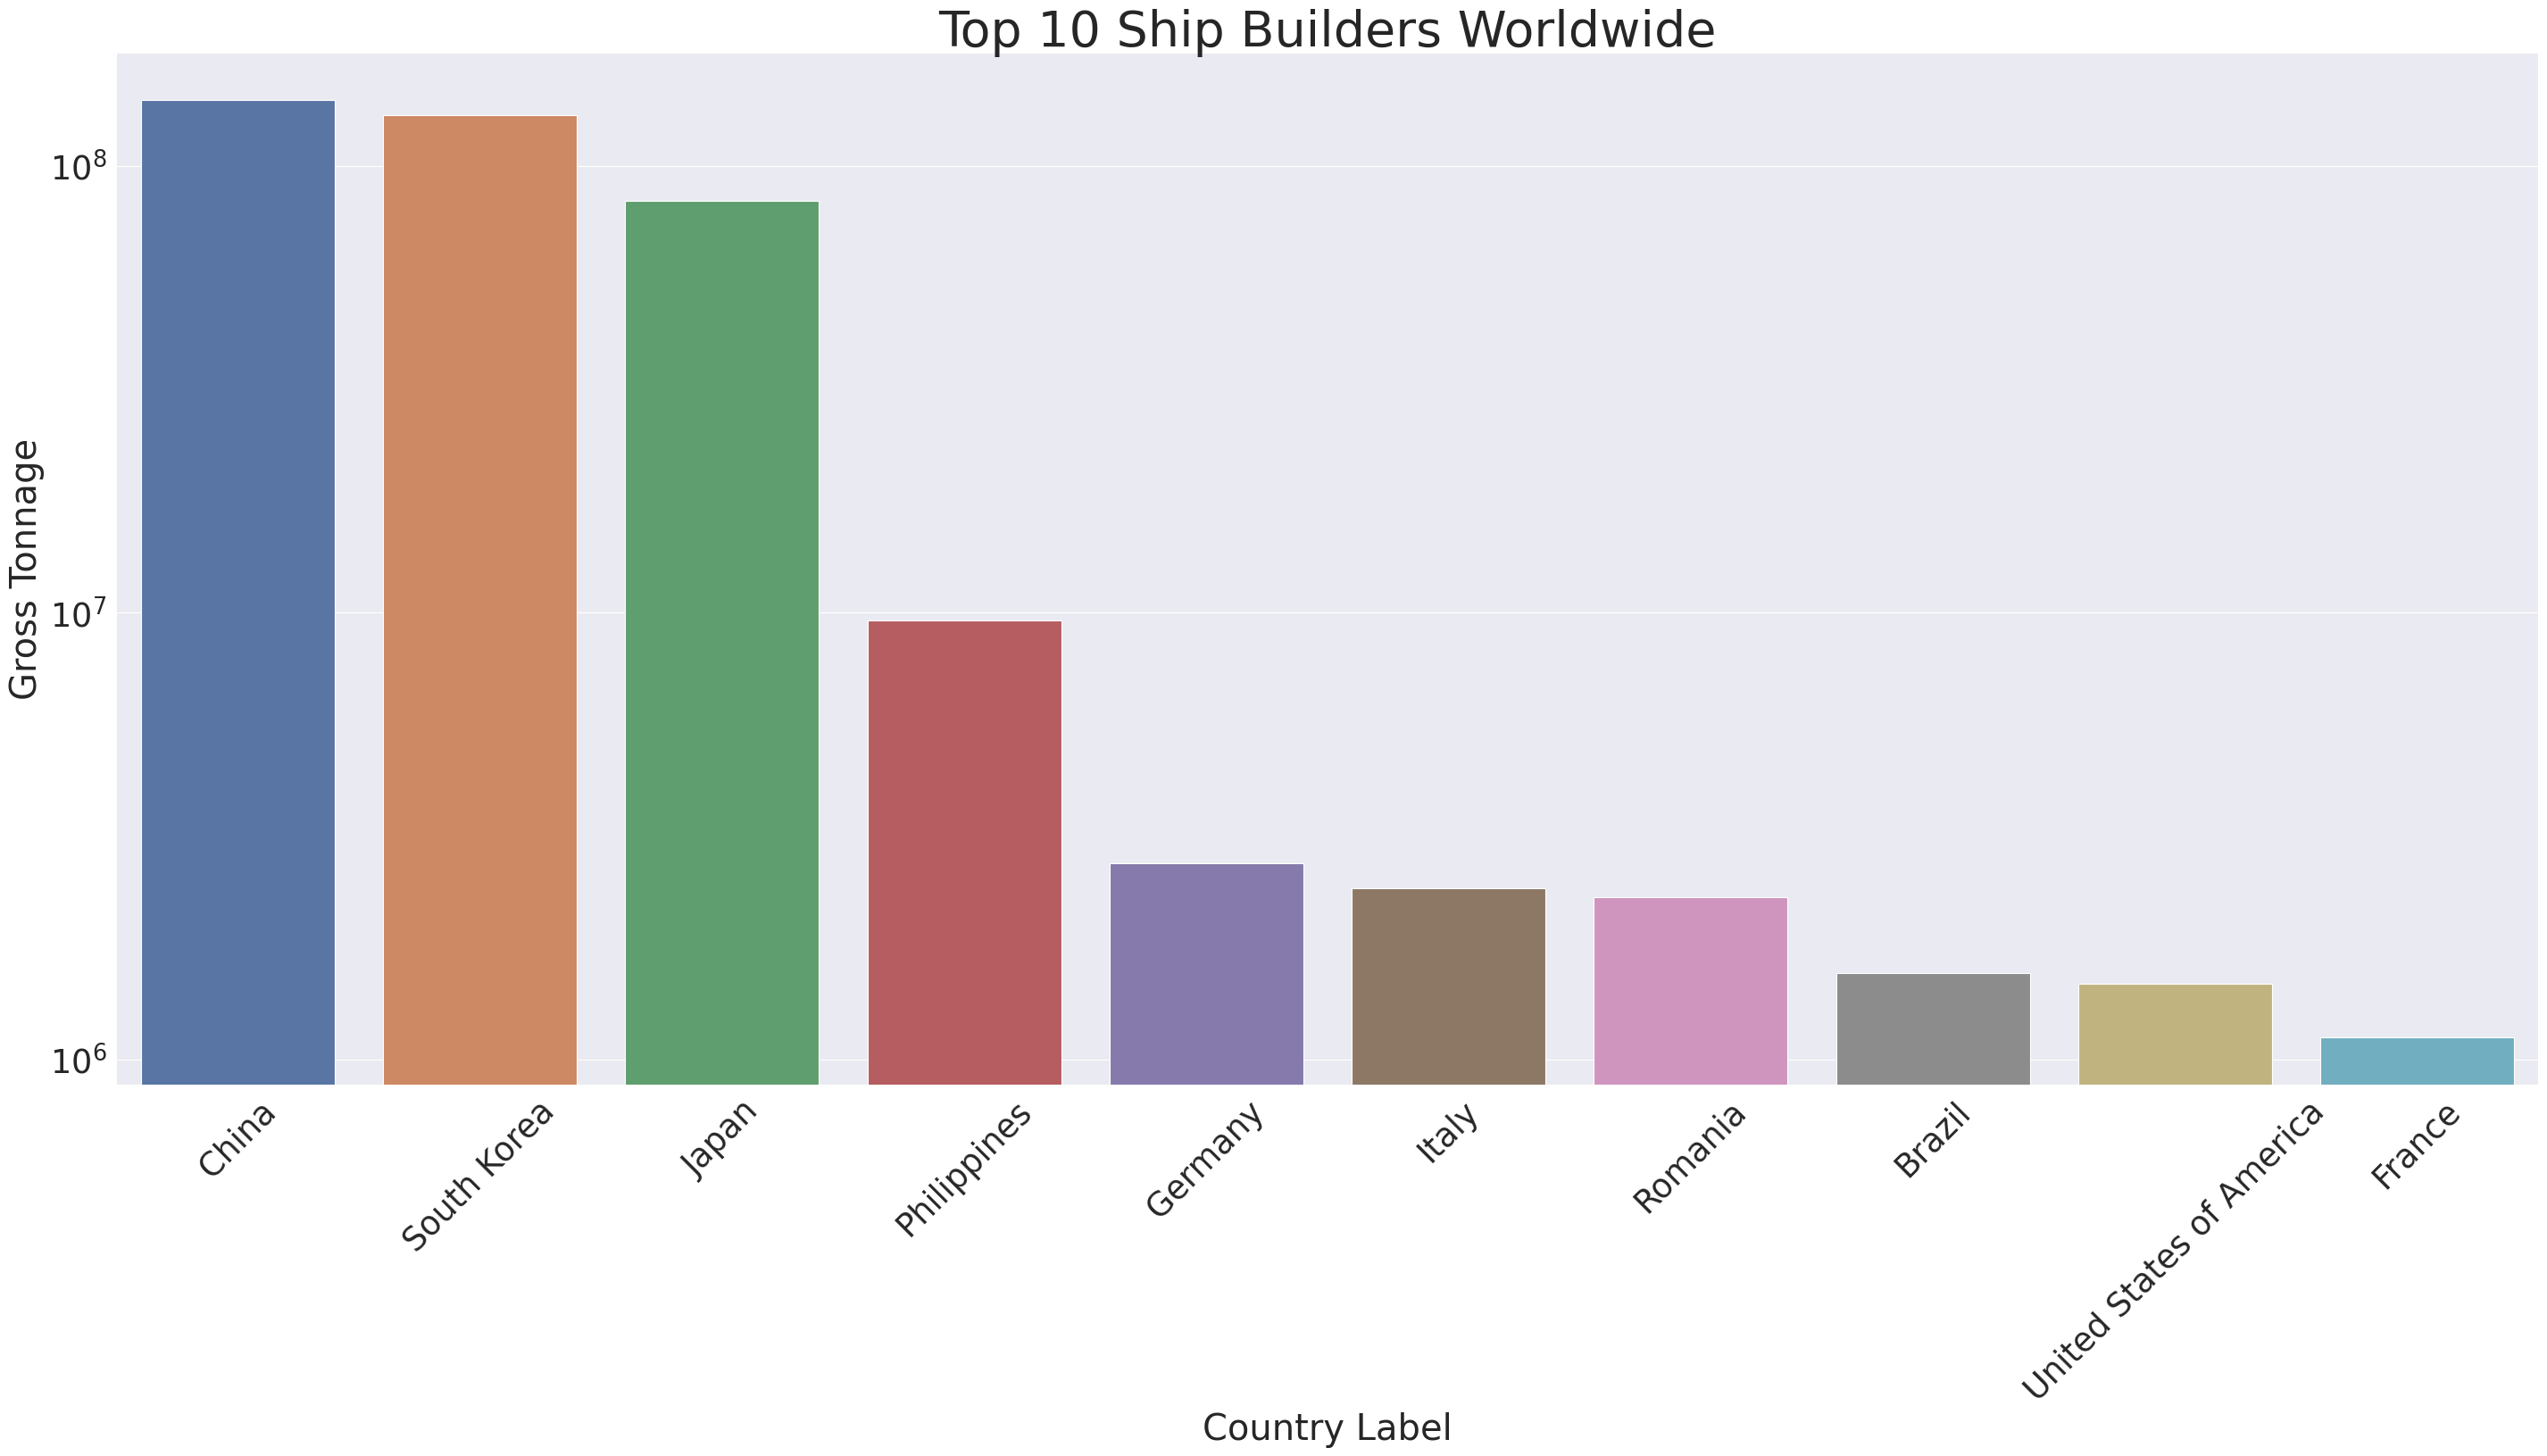

In [27]:
# Plot The world_ships 10 Ship Building Countries
upper_builders = total_build.head(10)
print(upper_builders)
fig, axes = plt.subplots(1, 1, figsize=(35, 15))
sns.barplot(data=upper_builders, x="Country Label", y="Gross Tonnage")
sns.despine(left=True, bottom=True)
plt.yscale('log')
plt.xticks(rotation=45)
plt.title("Top 10 Ship Builders Worldwide", fontsize=40)

China is the world's leading ship builder, followed by South Korea.

## q5) Where are most ships scrapped?

In [21]:
# read in the ship scraping csv data
ship_scrapping = pd.read_csv("/home/user/Downloads/ships/US_ShipScrapping_ST202010121509_v1.csv")
print(ship_scrapping.info())
print(ship_scrapping.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Year                                        603 non-null    int64  
 1   Series                                      603 non-null    int64  
 2   Series Label                                603 non-null    object 
 3   Country                                     603 non-null    object 
 4   Country Label                               603 non-null    object 
 5   ShipType                                    603 non-null    int64  
 6   ShipType Label                              603 non-null    object 
 7   Percentage of total all economies           603 non-null    float64
 8   Percentage of total all economies Footnote  0 non-null      float64
 9   Gross Tonnage                               603 non-null    float64
 10  Gross Tonnage 

In [22]:
# drop the two null columns
ship_scrapping = ship_scrapping.drop(columns=["Percentage of total all economies Footnote", "Gross Tonnage Footnote"])
print(ship_scrapping.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Year                               603 non-null    int64  
 1   Series                             603 non-null    int64  
 2   Series Label                       603 non-null    object 
 3   Country                            603 non-null    object 
 4   Country Label                      603 non-null    object 
 5   ShipType                           603 non-null    int64  
 6   ShipType Label                     603 non-null    object 
 7   Percentage of total all economies  603 non-null    float64
 8   Gross Tonnage                      603 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 42.5+ KB
None


In [23]:
#drop regional economies
ship_scrapping = ship_scrapping.replace("Korea, Republic of", "South Korea")
ship_scrapping["remove_region"] = validate_country(ship_scrapping["Country Label"])
ship_scrapping = ship_scrapping[ship_scrapping["remove_region"] == True]
print(ship_scrapping)

     Year  Series                              Series Label Country  \
2    2017    2307  Ship scrapping by country of destruction      31   
3    2017    2307  Ship scrapping by country of destruction      36   
4    2017    2307  Ship scrapping by country of destruction      50   
5    2017    2307  Ship scrapping by country of destruction      56   
6    2017    2307  Ship scrapping by country of destruction      76   
..    ...     ...                                       ...     ...   
598  2019    2307  Ship scrapping by country of destruction     792   
599  2019    2307  Ship scrapping by country of destruction     804   
600  2019    2307  Ship scrapping by country of destruction     818   
601  2019    2307  Ship scrapping by country of destruction     842   
602  2019    2307  Ship scrapping by country of destruction     926   

                Country Label  ShipType ShipType Label  \
2                  Azerbaijan         0    Total fleet   
3                   Australia  

In [24]:
# sort by 10 highest gross tonnage
ship_scrapping = ship_scrapping.groupby("Country Label")["Gross Tonnage"].sum().sort_values(ascending=False).reset_index()
ship_scrapping = ship_scrapping.head(10)

Text(0.5, 1.0, 'Top 10 Ship Scrappers Worldwide')

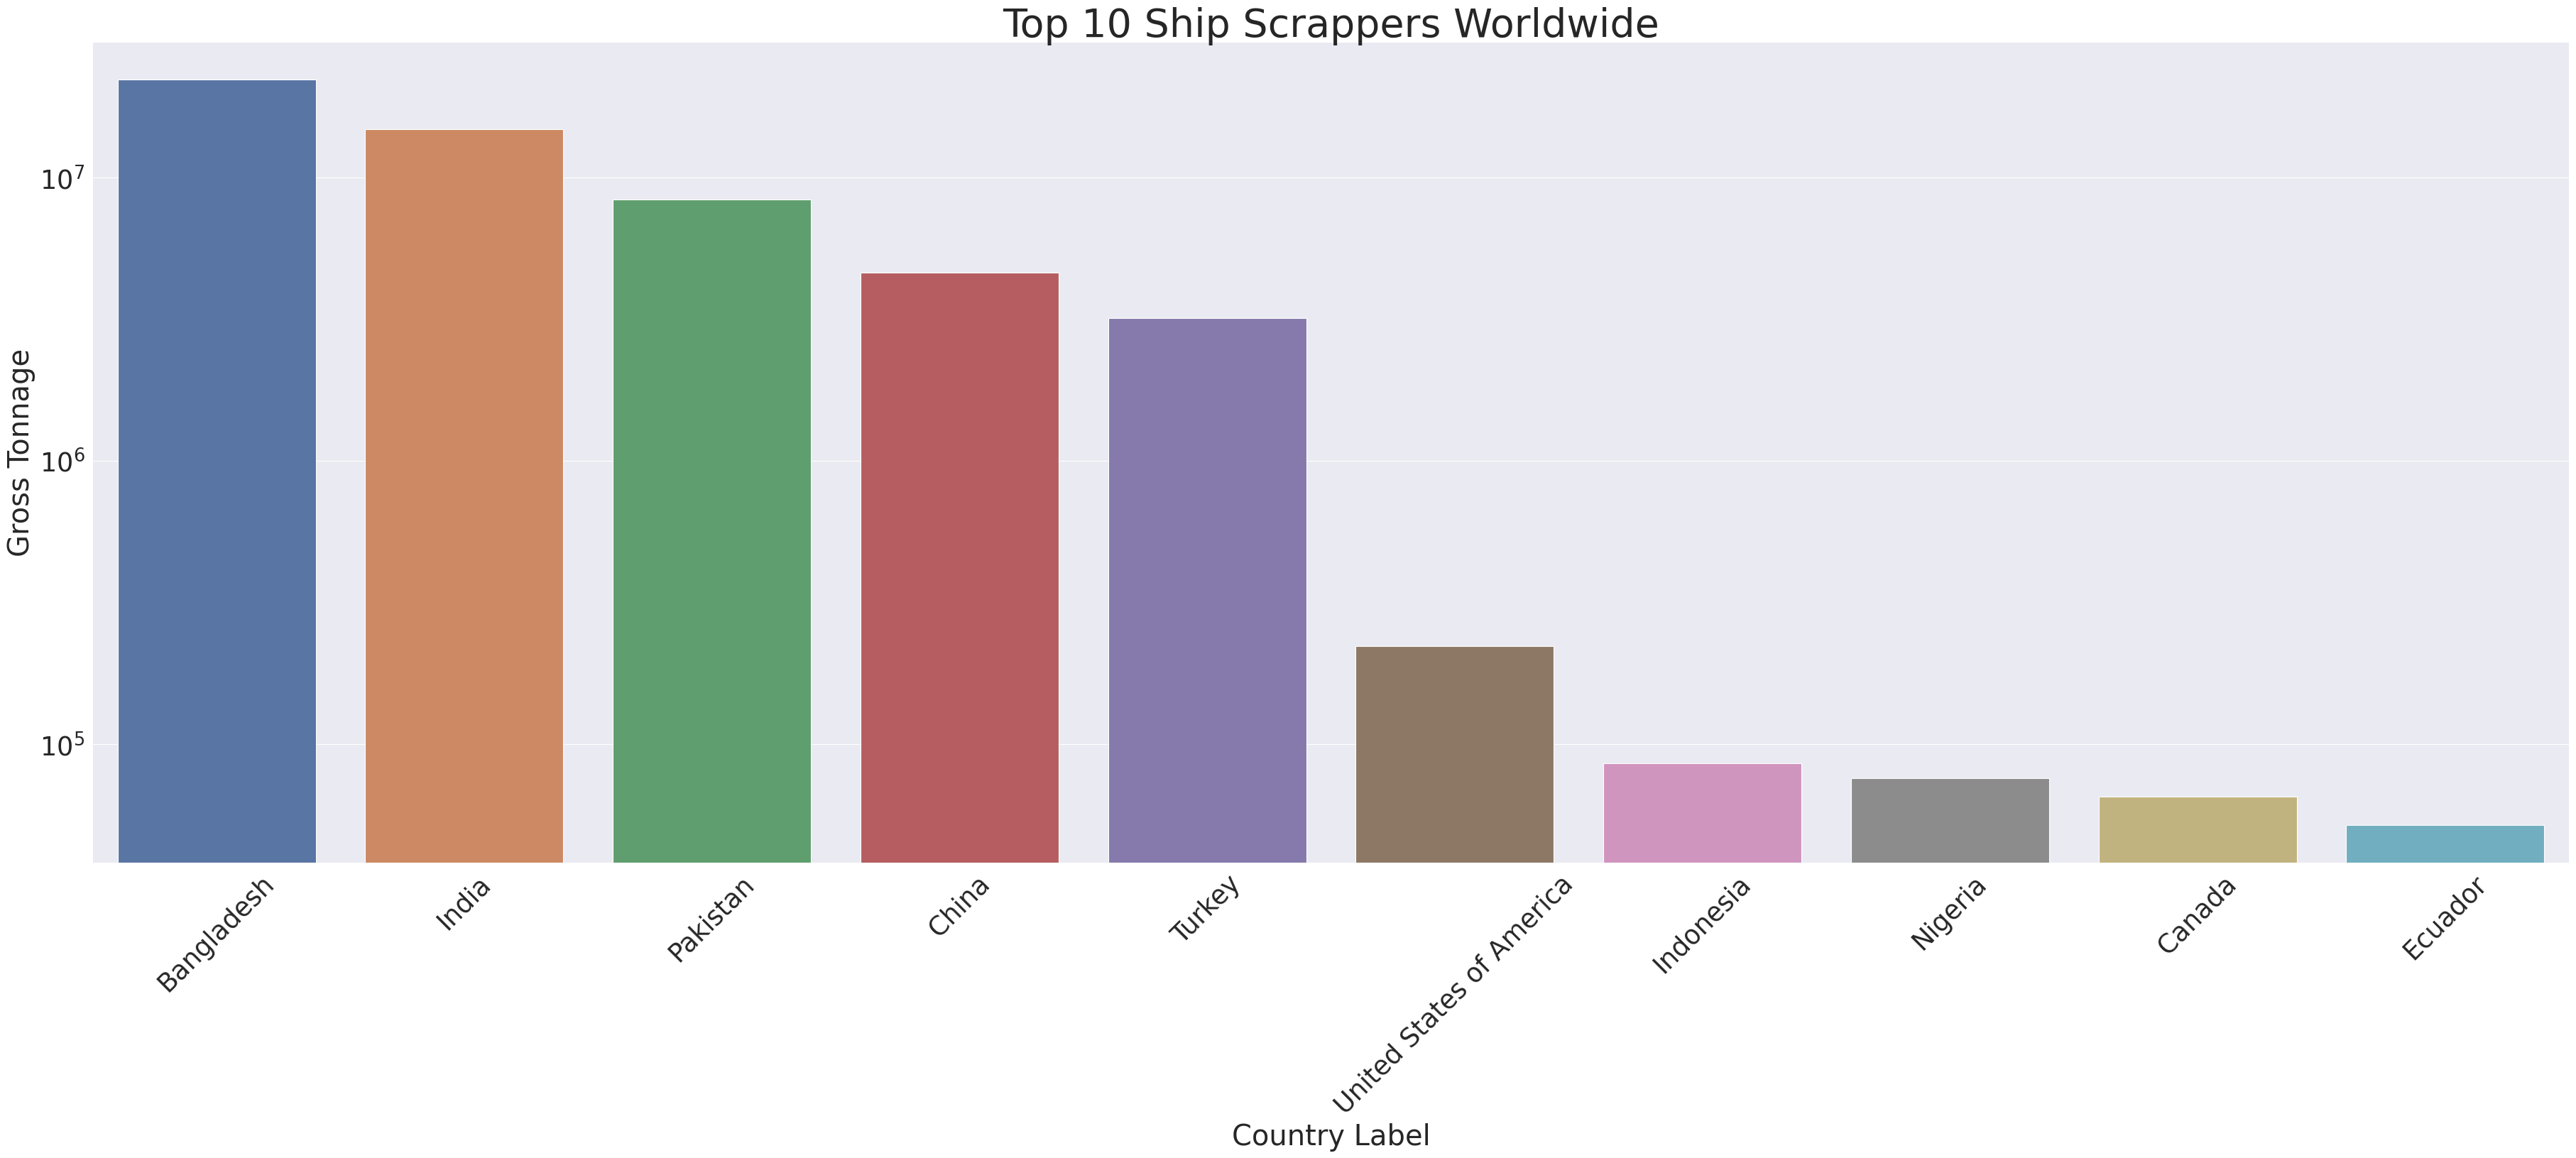

In [26]:
# plot the 10 highest scrappers
fig, axes = plt.subplots(1, 1, figsize=(45, 15))
sns.barplot(data=ship_scrapping, x="Country Label", y="Gross Tonnage")
sns.despine(left=True, bottom=True)
plt.yscale('log')
plt.xticks(rotation=45)
plt.title("Top 10 Ship Scrappers Worldwide", fontsize=40)

Bangladesh is the world's leading ship scrapping country followed by India, according to this data.